# Lab | Random Forests

For this lab, you will be using the CSV files provided in the `files_for_lab` folder.

### Instructions

- Apply the Random Forests algorithm but this time only by upscaling the data.
- Discuss the output and its impact in the bussiness scenario. Is the cost of a false positive equals to the cost of the false negative? How would you change your algorithm or data in order to maximize the return of the bussiness?


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
num = pd.read_csv('files_for_lab/numerical.csv')
cat = pd.read_csv('files_for_lab/categorical.csv')
t = pd.read_csv('files_for_lab/target.csv')

In [3]:
print(num.shape)
print(cat.shape)
print(t.shape)

(95412, 315)
(95412, 22)
(95412, 2)


In [4]:
t.columns

Index(['TARGET_B', 'TARGET_D'], dtype='object')

In [5]:
display(t['TARGET_B'].value_counts())
print()
display(t['TARGET_D'].value_counts())

0    90569
1     4843
Name: TARGET_B, dtype: int64

0.00     90569
10.00      941
15.00      591
20.00      577
5.00       503
         ...  
18.25        1
10.70        1
2.50         1
16.87        1
44.21        1
Name: TARGET_D, Length: 71, dtype: int64

In [6]:
data = pd.concat([num, cat, t], axis = 1)
display(data.head())
print(data.shape)

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0


(95412, 339)


In [7]:
data.isna().sum()[data.isna().sum()>0]

Series([], dtype: int64)

In [8]:
y = data['TARGET_B']
X = data.drop(['TARGET_B'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(object)

display(categoricalX.head())

for col in categoricalX.columns:
    print(col, categoricalX[col].nunique())

print()

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
encoded_categorical.columns = encoder.get_feature_names_out()
X = pd.concat([numericalX, encoded_categorical], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15)

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S


STATE 12
HOMEOWNR 2
GENDER 3
RFA_2R 1
RFA_2A 4
GEOCODE2 4
DOMAIN_A 5



In [9]:
print(len(X_train))
print(len(y_train[y_train==0]))

66788
63365


In [10]:
ros = RandomOverSampler(random_state=1)

X_train_over, y_train_over = ros.fit_resample(X_train, y_train)
display(y_train_over.value_counts())
display(pd.concat([X_train_over,y_train_over],axis=1).head())
print(X_train_over.shape)

0    63365
1    63365
Name: TARGET_B, dtype: int64

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,RFA_2A_F,RFA_2A_G,GEOCODE2_B,GEOCODE2_C,GEOCODE2_D,DOMAIN_A_R,DOMAIN_A_S,DOMAIN_A_T,DOMAIN_A_U,TARGET_B
0,1,55.000000,5,9,0,0,30,39,30,8,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,0,86.000000,1,7,0,0,17,30,37,6,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
2,28,43.000000,6,6,2,0,23,43,14,9,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,28,71.000000,1,7,24,2,46,32,34,11,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0,61.611649,5,9,0,0,18,0,59,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0


(126730, 355)


In [11]:
X_train = pd.DataFrame(X_train_over)
X_test = pd.DataFrame(X_test)
y_train = y_train_over

y_train_regression = X_train['TARGET_D']
y_test_regression = X_test['TARGET_D']

X_train = X_train.drop(['TARGET_D'], axis = 1)
X_test = X_test.drop(['TARGET_D'], axis = 1)
print(X_train.shape)
print(X_test.shape)

(126730, 354)
(28624, 354)


In [12]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
126725    1
126726    1
126727    1
126728    1
126729    1
Name: TARGET_B, Length: 126730, dtype: int64

The Accuracy for the Random Forest in the TRAIN set is 0.63
The Accuracy for the Random Forest in the TEST  set is 0.61


0    27204
1     1420
Name: TARGET_B, dtype: int64

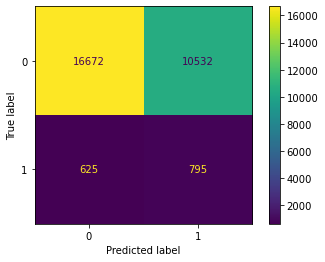

In [13]:


clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             max_samples=0.8,
                             random_state = 42)
clf.fit(X_train, y_train)

print("The Accuracy for the Random Forest in the TRAIN set is {:.2f}".format(clf.score(X_train, y_train)))
print("The Accuracy for the Random Forest in the TEST  set is {:.2f}".format(clf.score(X_test, y_test)))

y_pred = clf.predict(X_test)
display(y_test.value_counts())
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [14]:
from collections import Counter
print('Predicted results %s' % Counter(y_pred))
print((10532/(10532+795))*100)

Predicted results Counter({0: 17297, 1: 11327})
92.9813719431447


This is a fairly bad model. We have 11327 results predicted positively, in this case that means we're predicting they will respoond to the mailing and make a donation. However the vast majority of those, 10532 are actually false positives, where their true label is negative.  
If we went with the predicted results, over 90% of the mail we sent would get no response.  
That's really bad and it would have negative monetary impacts on the company

In [15]:
falsen_list = X_test[(y_test== 1) & (y_pred == 0)]
falsep_list = X_test[(y_test == 0) & (y_pred == 1)]

In [16]:
falsep_m = pd.merge(left=falsep_list, left_index=True,
                  right=y_test_regression, right_index=True,
                  how='inner')

falsen_m = pd.merge(left=falsen_list, left_index=True,
                  right=y_test_regression, right_index=True,
                  how='inner')

In [17]:
np.average(falsen_m['TARGET_D'])

21.055120000000002

In [18]:
falsep_m['TARGET_D'].sum()

0.0

According to the results, on average, each false negative is also costing the company around 21$ (minus mailing costs), which could easily add up considering we have nearly 50\% of false negatives

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score


print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred)))
print("The precision in the TEST set is: {:.2f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.2f}".format(recall_score(y_test,y_pred)))
print("The F1 in the TEST set is: {:.2f}".format(f1_score(y_test,y_pred)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred)))

The accuracy in the TEST set is: 0.61
The precision in the TEST set is: 0.07
The recall in the TEST set is: 0.56
The F1 in the TEST set is: 0.12
The Kappa in the TEST set is: 0.04


This further confirms that because our RandomForest model is deisgned to optimize accuracy by default, we ended with a really bad precision score and a rather mediocre recall score.  
To fix this let's get a model that attempts to optimize precision rather than accuracy  
and a second model that attemps to optimize recall

In [20]:
def my_precision_score(y_true, y_pred):
    return precision_score(y_true, y_pred)

In [21]:
def my_recall_score(y_true, y_pred):
    return recall_score(y_true, y_pred)

In [22]:
grid= {
    'max_depth' : [5],
    'min_samples_split' : [20],
    'min_samples_leaf' : [20],
    'max_samples' : [0.8]
     }

scorer_p=make_scorer(my_precision_score)
scorer_r=make_scorer(my_recall_score)

In [23]:
rfc=RandomForestClassifier()

gs_p = GridSearchCV(estimator = rfc, param_grid = grid, scoring = scorer_p, cv = 5)
gs_p.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'max_samples': [0.8],
                         'min_samples_leaf': [20], 'min_samples_split': [20]},
             scoring=make_scorer(my_precision_score))

In [24]:
print("The best precision score for the model is {:.4f}".format(gs_p.best_score_))

The best precision score for the model is 0.6239


In [25]:
gs_r = GridSearchCV(estimator = rfc, param_grid = grid, scoring = scorer_r, cv = 5)
gs_r.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5], 'max_samples': [0.8],
                         'min_samples_leaf': [20], 'min_samples_split': [20]},
             scoring=make_scorer(my_recall_score))

In [26]:
print("The best recall score for the model is {:.4f}".format(gs_r.best_score_))

The best recall score for the model is 0.6318


In [27]:
y_pred_p=gs_p.predict(X_test)
y_pred_r=gs_r.predict(X_test)

In [28]:
print("The actual precision for the precision model is {:.4f}".format(my_precision_score(y_test, y_pred_p)))
print("The actual recall for the recall model is {:.4f}".format(my_recall_score(y_test, y_pred_r)))

The actual precision for the precision model is 0.0699
The actual recall for the recall model is 0.5669


In [29]:
print('Comparing the above results to the original ones:')
print()
print("The precision in the TEST set is: {:.4f}".format(precision_score(y_test,y_pred)))
print("The recall in the TEST set is: {:.4f}".format(recall_score(y_test,y_pred)))

Comparing the above results to the original ones:

The precision in the TEST set is: 0.0702
The recall in the TEST set is: 0.5599


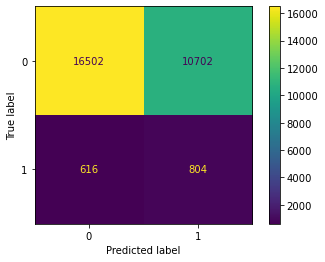

In [30]:
cm_p=confusion_matrix(y_test, y_pred_p)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_p)
disp.plot()
plt.show()

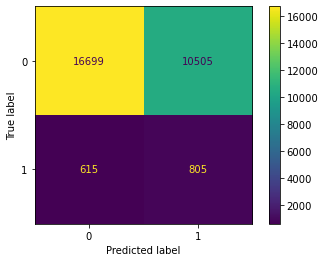

In [31]:
cm_r=confusion_matrix(y_test, y_pred_r)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_r)
disp.plot()
plt.show()

In [32]:
### according to the confusion matrixes they definitely didn't optimize for what they should've, and somehow the precision
### model has better recall and the recall model has better precision 